# Difference Equations

If you don't see Julia among the kernels: From the Julia promt, push `]`, then
```
add IJulia
```
The push backspace and
```
using IJulia
jupyterlab()
```

## First-order difference equations
$$
x_t = F_t(x_{t-1})
$$


### First-order linear difference equations


$$
x_t = a x_{t-1} + b
$$
Substract $b/(1-a)$:
$$
x_t - b/(1-a) = a x_{t-1} +b - b/(1-a) 
$$
$$
x_t - b/(1-a) = a (x_{t-1} - b/(1-a)) 
$$
$$
\tilde x_t = a \tilde x_{t-1}
$$
with $\tilde x_t = x_t-b/(1-a)$


Suppose $x_o = c$ and assume $b=0$
$$
x_t = ax_{t-1} = a^2 x_{t-2}=..
$$
$$
x_t = a^t c
$$

### Functions


In [1]:
function AR1(x, a, b)
    return a * x + b
end

AR1 (generic function with 1 method)

In [2]:
AR1(1.0, 0.99, 0.0)

0.99

### For loops

In [3]:
T = 20
x_lag = 2.5
a = 0.75
b = 1.0

for t = 1:T
    println(x_lag)
    x_current = AR1(x_lag, a, b)
    x_lag = x_current
end
println(x_current)

2.5
2.875
3.15625
3.3671875
3.525390625
3.64404296875
3.7330322265625
3.799774169921875
3.8498306274414062
3.8873729705810547
3.915529727935791
3.9366472959518433
3.9524854719638824
3.964364103972912
3.973273077979684
3.979954808484763
3.984966106363572
3.988724579772679
3.9915434348295094
3.993657576122132


UndefVarError: UndefVarError: x_current not defined

See the [docs on variable scope](https://docs.julialang.org/en/v1/manual/variables-and-scoping/#scope-of-variables), they are pretty complex.

# Exercise
> Write a for loop that prints the first 5 square numbers.

In [4]:
for t = 1:5
    println(t^2)
end

1
4
9
16
25


In [5]:
T = 5
for t = 1:T
    println(i^2)
    i = i + 1
end

UndefVarError: UndefVarError: i not defined

In [6]:
i

UndefVarError: UndefVarError: i not defined

### Types and multiple dispatch

In [7]:
function AR1(x::Float64, a::Float64, b::Float64)
    return a * x + b
end

AR1 (generic function with 2 methods)

### Vectors and N-dimensional arrays

In [8]:
X = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [9]:
Z = [1.0, 2.0, 3.0]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [10]:
typeof(2//3)

Rational{Int64}

In [11]:
typeof(2/3)

Float64

In [12]:
2//3 * 3

2//1

In [13]:
2/3 * 3

2.0

In [14]:
typeof(1.0 + 2im)

Complex{Float64}

In [15]:
(im)^2

-1 + 0im

In [16]:
sqrt(4.0)

2.0

In [17]:
sqrt(-1.0)

DomainError: DomainError with -1.0:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [18]:
sqrt(-1.0 + 0im)

0.0 + 1.0im

In [19]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [20]:
b_is_not_a_vector = [1 2]

1×2 Array{Int64,2}:
 1  2

In [21]:
c_is_a_vector = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [22]:
eye = [1 0; 0 1]

2×2 Array{Int64,2}:
 1  0
 0  1

In [23]:
c_is_a_vector' * eye 

1×2 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  2

In [24]:
function AR1(x::Array{Float64, 1}, a::Float64, b::Float64)
    return a .* x .+ b
end

AR1 (generic function with 3 methods)

In [25]:
AR1(Z, 0.8, 0.0)

3-element Array{Float64,1}:
 0.8
 1.6
 2.4000000000000004

In [26]:
typeof(X)

Array{Int64,1}

In [27]:
function forecast_AR1!(x::Array{Float64, 1}, a::Float64)
    T = length(x)
    for t = 2:T
        x[t] = a * x[t-1]
    end
end

forecast_AR1! (generic function with 1 method)

In [28]:
X = ones(10)
forecast_AR1!(X, 0.7)
println(X)

[1.0, 0.7, 0.48999999999999994, 0.3429999999999999, 0.24009999999999992, 0.16806999999999994, 0.11764899999999995, 0.08235429999999996, 0.05764800999999997, 0.04035360699999998]


### 

In [29]:
using Plots

In [30]:
using Pkg
Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %======>                                 ]  17.2 %                        ]  38.6 %=======================>                 ]  55.8 % [=========================>               ]  60.7 %]  77.8 %=======================================> ]  95.0 %Fetching: [=======================================> ]  95.4 %

  Resolving package versions...
   Updating `~/Tresorit/teaching/courses/2020/ECBS-6001-Advanced-Macroeconomics/Project.toml`
 [no changes]
   Updating `~/Tresorit/teaching/courses/2020/ECBS-6001-Advanced-Macroeconomics/Manifest.toml`
 [no changes]


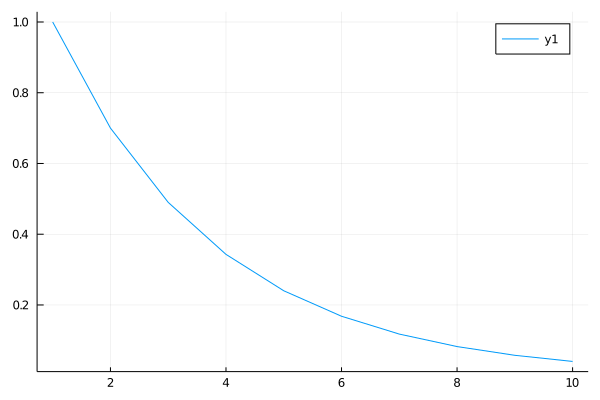

In [31]:
using Plots
plot(X)

In [32]:
A = [1 2 3 4; 2 4 6 8]

2×4 Array{Int64,2}:
 1  2  3  4
 2  4  6  8

In [33]:
X

10-element Array{Float64,1}:
 1.0
 0.7
 0.48999999999999994
 0.3429999999999999
 0.24009999999999992
 0.16806999999999994
 0.11764899999999995
 0.08235429999999996
 0.05764800999999997
 0.04035360699999998

## Plotting

In [34]:
Pkg.precompile()

Precompiling project...


In [35]:
using Plots

# Exercise
> Plot the first 5 square numbers.

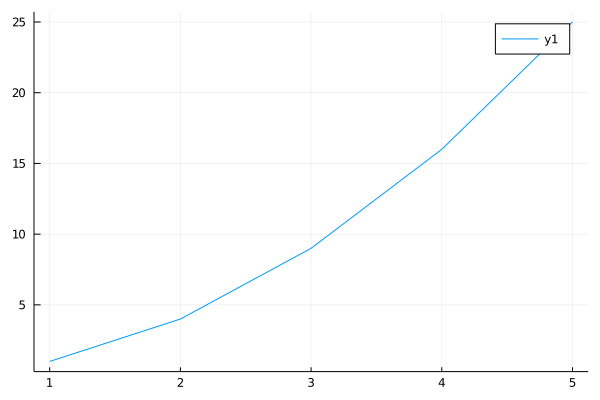

In [36]:
plot([1, 2, 3, 4, 5] .^ 2)

### Stability properties
Remember, for first-order difference equation
$$
x_t = a x_{t-1}
$$
Solution
$$
x_t = c a^t
$$
with $c$ pinned down by the boundary condition.

Stable when
$$
|a| < 1.
$$

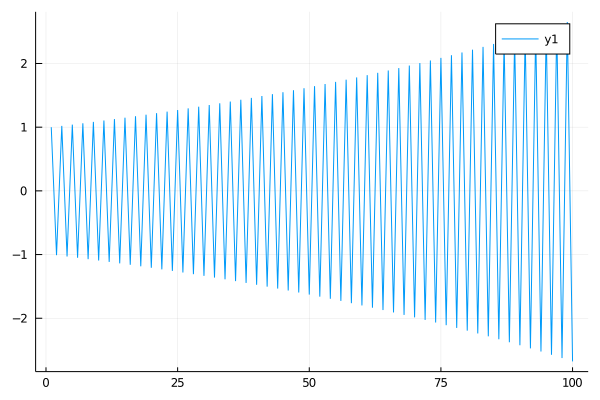

In [37]:
X = ones(100)
forecast_AR1!(X, -1.01)
plot(X)

### Second-order linear difference equations
$$
x_t = a_1 x_{t-1} + a_2 x_{t-1} + b
$$
Similarly, we can subtract $b/(1 - a_1 - a_2)$ so that the series converges to 0.

In [38]:
function forecast_AR2!(x::Vector{Float64}, a1::Float64, a2::Float64)
    T = length(x)
    for t = 3:T
        x[t] = a1 * x[t-1] + a2 * x[t-2]
    end
end

forecast_AR2! (generic function with 1 method)

In [39]:
Z = zeros(10)
Z[2] = 1.0
Z

10-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

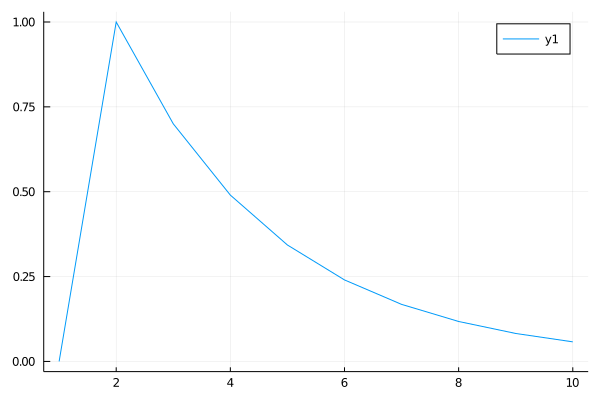

In [40]:
forecast_AR2!(Z, 0.7, 0.0)
plot(Z)

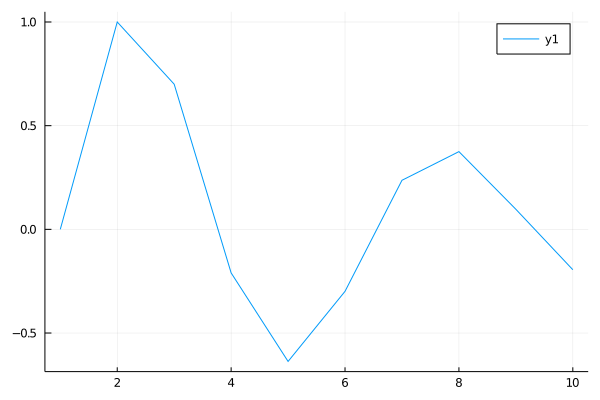

In [41]:
forecast_AR2!(Z, 0.7, -0.7)
plot(Z)

# Exercise
> Plot the solution for the following difference equation:
> $$ x_t = 1.6 x_{t-1} - 0.64 x_{t-2}$$

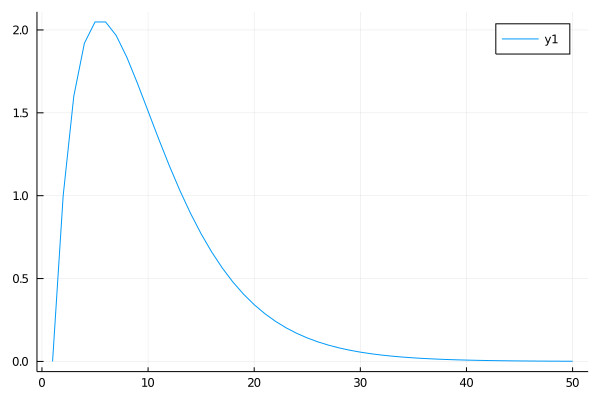

In [42]:
Z = zeros(50)
Z[2] = 1.0
forecast_AR2!(Z, 1.6, -0.64)
plot(Z)

### The lag operator
Let $Lx_t \equiv x_{t-1}$. By induction, $L^px_t = x_{t-p}$. We can write
$$
x_t = a_1 L x_t + a_2 L^2 x_t
$$
$$
(1 - a_1 L  - a_2 L^2) x_t = 0
$$


This is a linear operator:
$$ 
L(ax_t + b z_t) = aLx_t + b Lz_t
$$

We can decompose into
$$
(1 - \lambda_1 L) (1 - \lambda_2 L) x_t = 0
$$

such that
$$
\lambda_1\lambda_2 = -a_2
$$
and
$$
\lambda_1 +\lambda_2 = a_1
$$

We have to study the "roots" $\lambda_1$ and $\lambda_2$.

Recall for AR1:
$$
(1- aL)x_t = 0
$$
had the solution $x_t = c a^t$. If $x_{t1}$ is a solution to AR1 with $\lambda_1$, then $(1-\lambda_1 L)x_{t1} = 0$ for all $t$. Btw, $x_{t1} = c_1 \lambda_1^t$.
Then $x_{t1}$ and $x_{t2}$ are both solutions to AR2. The generic solution is
$$
x_t = c_1 \lambda_1^t + c_2 \lambda_2 ^t.
$$


In [43]:
function forecast_with_lambda!(x::Vector{Float64}, λ1::Complex, λ2::Complex)
    a1 = (λ1 + λ2)
    a2 = (- λ1 * λ2)
    T = length(x)
    for t = 3:T
        x[t] = a1 * x[t-1] + a2 * x[t-2]
    end
end

forecast_with_lambda! (generic function with 1 method)

In [44]:
Z

50-element Array{Float64,1}:
 0.0
 1.0
 1.6
 1.9200000000000004
 2.048000000000001
 2.048000000000001
 1.966080000000001
 1.8350080000000013
 1.6777216000000015
 1.5099494400000018
 1.342177280000002
 1.1811160064000021
 1.0307921510400022
 ⋮
 0.009865364031216382
 0.00809998309931451
 0.006646139978924731
 0.005449834782718285
 0.004466206065837428
 0.003658035444400183
 0.0029944848289043388
 0.0024500330418308256
 0.002003582576430544
 0.0016377109755171427
 0.00133804471191188
 0.0010927365147280364

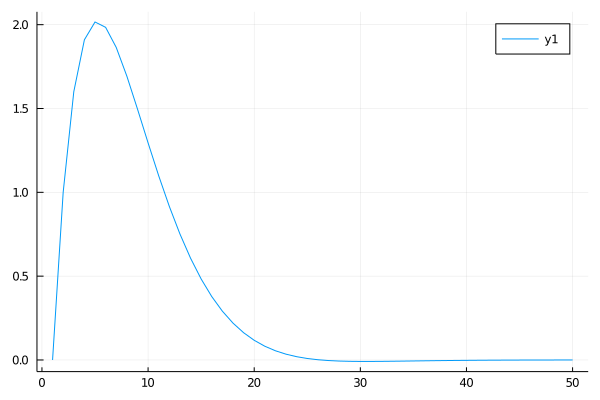

In [46]:
forecast_with_lambda!(Z, 0.8+0.1im, 0.8-0.1im)
plot(Z)

## October 6
We will begin each class with rerunning all the cells above.

> Note: not any pair of complex numbers work as these have to be roots of a quadratic equation. I will fix this for next class.

$$
a_1 = \lambda_1 + \lambda_2
$$
$$
a_2 = - \lambda_1 \lambda_2
$$
$$
\lambda_i = l_i + m_i i
$$
for $a_1$ to be real
$$
m_1 + m_2 = 0
$$
for $a_2$ be real
$$
l_1 l_2 + l_1 m_2i + l_2 m_1 i
- m_1m_2
$$
needs to be real:
$$
(l_1 - l_2)m_1 = 0
$$
either $m_1=0$ then $l_1 \neq l_2$,
or $l_1=l_2$.

In [60]:
Complex(3, 4)

3 + 4im

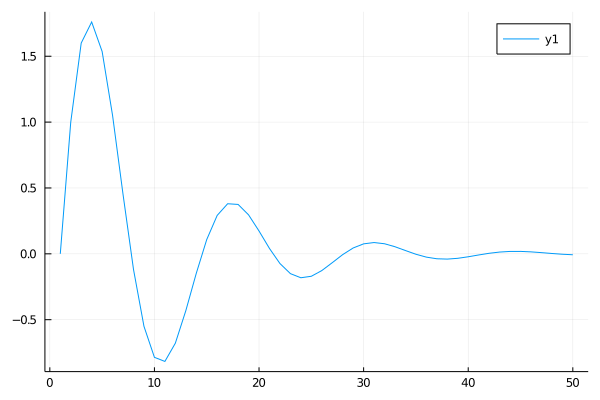

In [52]:
forecast_with_lambda!(Z, 0.8 + 0.4im, 0.8 - 0.4im)
plot(Z)

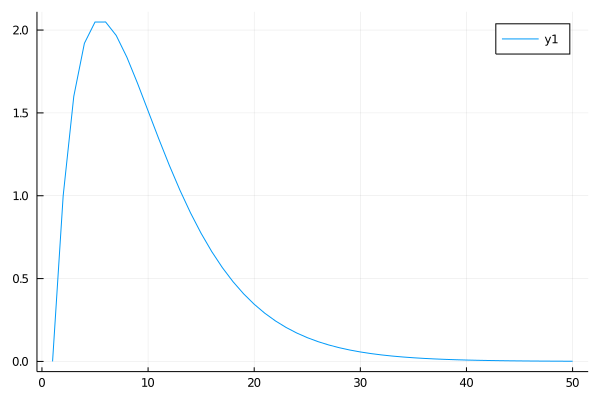

In [57]:
forecast_with_lambda!(Z, 0.79+0im, 0.81+0im)
plot(Z)

### Solution and stability properties
Recall 
$$
x_t = \sum_k c_{k1} \lambda_k^t.
$$

Take a linear homogeneous difference equation with order $p$. Let $\lambda_k$ be a root with multiplicity $m_k$. Then the solution is
$$
x_t = \sum_k (c_{k1} + c_{k2}t + ... + c_{km_k}t^{m_k}) \lambda_k^t.
$$


In [58]:
function forecast_with_common_root!(x::Vector{Float64}, λ::Real)
    # make sure boundary conditions are met
    # suppose we start from t = 0, which is at x[1]
    c1 = x[0+1]
    c2 = x[1+1] / λ - c1
    
    T = length(x)
    for t = 0:T-1
        x[t+1] = (c1 + c2*t) * λ^t
    end
end

forecast_with_common_root! (generic function with 1 method)

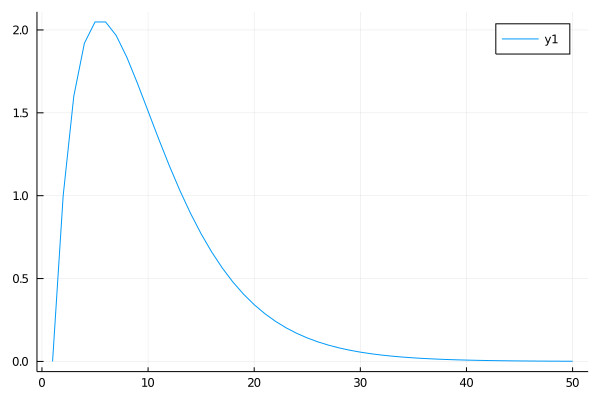

In [59]:
forecast_with_common_root!(Z, 0.8)
plot(Z)

# Exercise
> Write a function that verifies, for a given $\lambda=\lambda_1=\lambda_2$ that the solution of the difference equation is the same as the forecast.

`forecast_with_common_root!` vs `forecast_with_lambda!`

In [80]:
function compare_forecast_to_solution(λ::Real)
    x = zeros(100)
    x[1] = 1.0
    
    z = copy(x)
    
    forecast_with_common_root!(x, λ)
    forecast_with_lambda!(z, λ+0im, λ+0im)
    
    return maximum( abs.(z .- x))
end

compare_forecast_to_solution (generic function with 1 method)

In [81]:
compare_forecast_to_solution(0.8)

8.326672684688674e-16

In [60]:
# Gotcha: B = A does not create a copy, B will refer to the *same* vector
A = zeros(2)
B = A
B[1] = 2
A

2-element Array{Float64,1}:
 2.0
 0.0

In [61]:
# this way we have to clean copies of the zero vector
A = zeros(2)
B = zeros(2)
B[1] = 2
A

2-element Array{Float64,1}:
 0.0
 0.0

In [66]:
A = zeros(2)
B = copy(A)
B[1] = 2
A

2-element Array{Float64,1}:
 0.0
 0.0

In [77]:
# with floating points, numbers need not be exactly equal
0.0 ≈ 10^(-23)

false

In [82]:
max(2, 0)

2

In [83]:
maximum([2 0])

2

In [87]:
max.([2 0], [1 1])

1×2 Array{Int64,2}:
 2  1

## Two-dimensional linear systems
Overview of [Linear Algebra Library](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/)

In [94]:
function forecast_ndim_AR1!(x::Array{Float64, 2}, A::Array{Float64, 2})
    _, T = size(x)
    for t = 2:T
        x[:, t] = A * x[:, t-1]
    end
end

forecast_ndim_AR1! (generic function with 1 method)

In [89]:
size(zeros(2, 3, 100))

(2, 3, 100)

In [97]:
x = zeros(2, 100)
x[:, 1] = ones(2)
x

2×100 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [98]:
A = [0.9 -0.1; 0.1 0.9]

2×2 Array{Float64,2}:
 0.9  -0.1
 0.1   0.9

In [99]:
x[3]

0.0

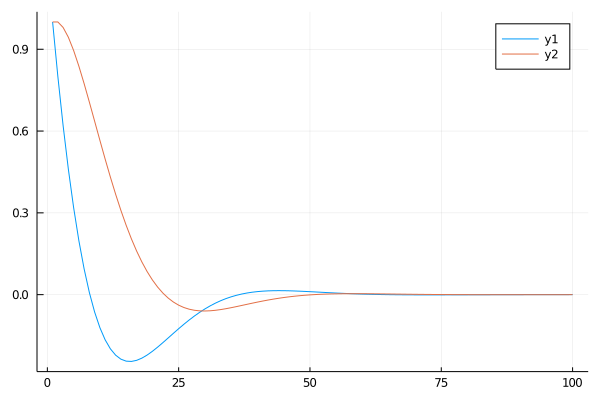

In [100]:
forecast_ndim_AR1!(x, A)
plot(x')

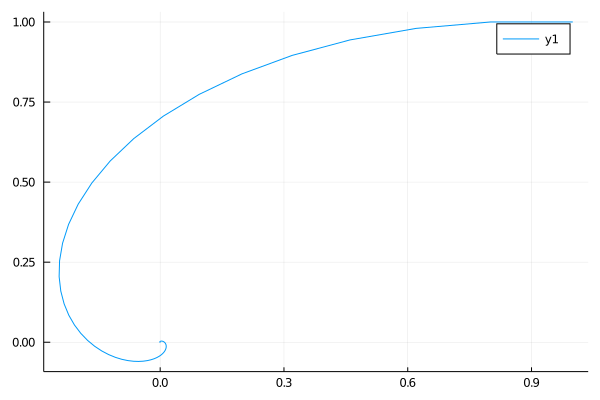

In [101]:
plot(x[1,:], x[2,:])

In [102]:
function plot_trajectory(A::Array{Float64, 2})
    x = zeros(2, 100)
    x[:, 1] = ones(2)
    
    forecast_ndim_AR1!(x, A)
    plot(x[1,:], x[2,:])
end

plot_trajectory (generic function with 1 method)

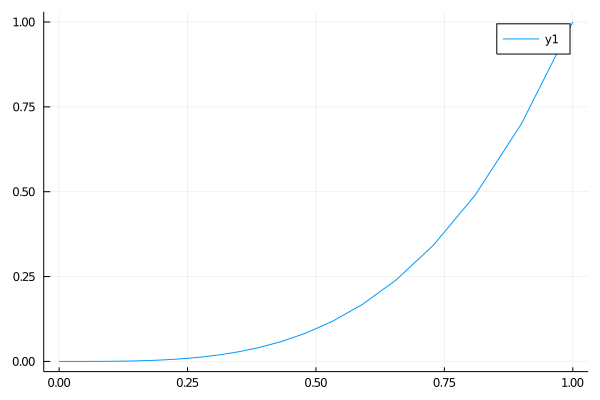

In [106]:
plot_trajectory([0.9 0.0; 0.0 0.7])

### Every system is first order

### Eigenvalues and stability properties
$$
\mathbf x_t = 
\mathbf A \mathbf x_{t-1}+\mathbf b
$$
set $\mathbf b =0$.
$$
\mathbf x_t = \mathbf A^2 \mathbf x_{t-2} = \mathbf A^t \mathbf x_0
$$
$$
y = X\beta
$$
$$
\mathbf x =
\begin{bmatrix}
x_{1t} & x_{1t+1} & ...\\
x_{2t} & x_{2t+1} & ...
\end{bmatrix}
$$

$A$ has an eigenvalue decomposition
$$
\mathbf A = 
\mathbf Q
\mathbf \Lambda
\mathbf Q^{-1}
$$
$$
\mathbf v_t = \mathbf Q^{-1} \mathbf x_t
$$
$$
\mathbf v_t = \mathbf\Lambda \mathbf v_{t-1}
$$

In [107]:
A

2×2 Array{Float64,2}:
 0.9  -0.1
 0.1   0.9

In [108]:
using LinearAlgebra
eigvals(A)

2-element Array{Complex{Float64},1}:
 0.9 - 0.1im
 0.9 + 0.1im

In [109]:
eigvals([1 0; 0 1])

2-element Array{Float64,1}:
 1.0
 1.0

## Exercise (algebra)

> Show that the eigenvalues of the $\mathbf A$ matrix of the 2-dimensional system are the same as the roots of the characteristic equation of the 2nd-order system.
> 
> *Hint:* If $\mu_i$ is an eigenvalue of $\mathbf A$, then $\text{det}(\mathbf A - \mu_i \mathbf I)=0$. Solve for $\mu_1$ and $\mu_2$ and show that $\mu_1+\mu_2 = a_1$ and $\mu_1 \mu_2 = -a_2$ just like with $\lambda_1$ and $\lambda_2$.


## Stochastic difference equations